## Do import statements

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 
import jax 
import numpyro 
from getdist import plots, MCSamples
import getdist
import glob
from astropy.io import fits
import astropy.units as u
import math
import scipy
from scipy.integrate import quad
import matplotlib.patches as mpatches
import astropy.constants as con
from astropy.cosmology import wCDM 
cosmo = wCDM(H0=70, Om0=0.315, Ode0=0.7, w0=-1.0)

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

## Read in the JLA data file and assign columns of the dataframe to variables.

In [10]:
# assign data from each column to specified parameters (z,C,X1)
data = pd.read_csv("/Users/mwiesner/CosmoBen/data/jla_lcparams.txt", delim_whitespace=True, header=0)
columns = ['mb', 'zcmb', '3rdvar', 'x1', 'color']
#mb is peak magnitude
#zcmb is redshift
#3rdvar is log10 host stellar mass
#x1 is SALT2 shape parameter
#color is color parameter

zs =  data['zcmb']
mb =  data['mb']
Mstellar = data['3rdvar']*10**10*u.Msun
X1 = data['x1']
C = data['color']
#data_filtered = data[columns]
#data_filtered.columns = ['mb', 'redshift', 'M_stellar', 'X_1', 'C']
#mb=data_filtered['mb']
#zs=data_filtered['redshift']
#Mstellar=data_filtered['M_stellar']
#X1=data_filtered['X_1']
#C=data_filtered['C']

## Define functions that will be used to implement this equation:
Both of these are from Alsing (2018). 

The first defines apparent magnitude based on luminosity distance and absolute magnitude and light curve stretch parameter and color. 

The second calculates luminosity distance to go into the first equation.

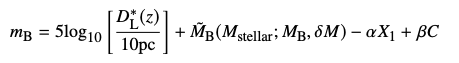

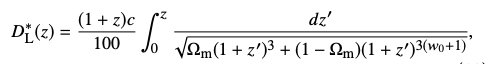

In [11]:
"""
Implement the Heaviside function
"""
def Heavi(Mstellar):
    if Mstellar >= 10**10:
        Heaviside = 1
    else:
        Heaviside = 0
    return Heaviside

"""
Determine the absolute magnitude, for the second term of the equation above.
"""
def absM(Mstellar,Mb,deltM):
    absMag=Mb+(deltM*Heavi(Mstellar))
    return absMag

"""
integrand should depend on Om_m,z,w0

Implement the Heaviside function
"""

def integrand(z,Om_m=0.315,w0=-1):
    den1 = Om_m*(1+z)**3+(1-Om_m)*(1+z)**(3*(w0+1))
    #den1 = Om_m*(1+z)**3
    #den2 = (1-Om_m)
    #den3 = (1+z)**(3*(w0+1))
    integ=1/np.sqrt(den1)
    return integ

def D_L(z,Om_m=0.315,w0=-1):
    factor=(((1+z)*(con.c.value/1000))/70)
    integ=(quad(integrand,0,z))[0]
    return factor*integ
 
def m_b(z,Om_m,w0,alpha,beta,Mstellar,X1,C,Mb,deltM):
    D_l=D_L(Om_m,z,w0)
    frontfactor=(5*np.log10(D_l)*u.pc)/(10*u.pc)
    absMb=absM(Mstellar,Mb,deltM)
    pt3= -(alpha*X1) + (beta*C)
    return frontfactor +absMb + pt3

In [12]:

cosmo = wCDM(H0=70, Om0=0.3, Ode0=0.7, w0=-0.9)

In [13]:
"""These are the six parameters we are fitting for. We start them at these values:
"""
Om_m = 0.315
w0 = -1
Mb = -19.3
deltM = -.061
alpha = 0.1257
beta = 2.644

In [17]:
"""Calculate the apparent magnitude by implementing equation 9 of Alsing et al. 
"""

df = pd.DataFrame(columns=['magnitude', 'D_lum', 'redshift'])

for i in range(0, len(zs)):
    mB_final= 5*np.log10(((D_L(zs[i])*10**6)/10)) + absM(Mstellar[i],Mb,deltM) -(alpha*X1[i])+(beta*C[i])
    new_row = {'magnitude': mB_final, 'D_lum': D_L(zs[i]), 'redshift': zs[i]}
    df.loc[len(df)] = new_row
    print(alpha)

print(df)

0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257
0.1257

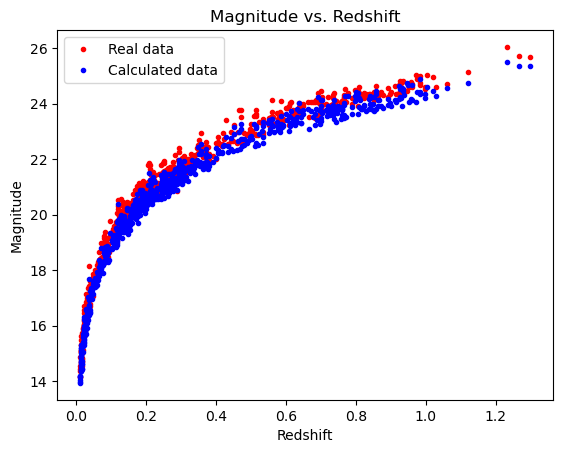

In [7]:
# Assuming your arrays are a and b
plt.plot(zs, mb, 'r.', label='Real data')
plt.plot(zs, df['magnitude'], 'b.', label='Calculated data')

# Add labels and title (optional)
plt.xlabel("Redshift")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Redshift")
plt.legend()

# Display the plot
plt.show()


## Now let's calculate and plot distance modulus
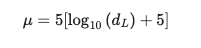

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


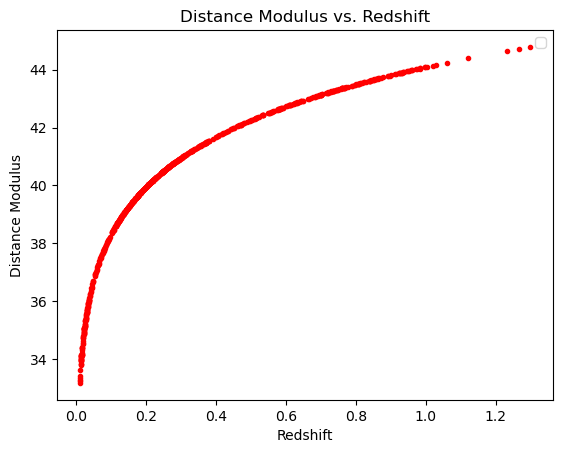

In [10]:
D_L = df['D_lum']
mu = 5*(np.log10(D_L)+5)

plt.plot(zs, mu, 'r.')

# Add labels and title (optional)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.title("Distance Modulus vs. Redshift")
plt.legend()

# Display the plot
plt.show()


# Inference
We need some code here to do the inference of the parameters. There is a nice introduction to `numpyro` [here](https://dfm.io/posts/intro-to-numpyro/). We also need priors on the parameters. Let us use the following:

- $\Omega_{m}\sim U[0.001, 0.6]$
- $w_{0}\sim U[-1.5, 0.0]$
- $M_{B}\sim \mathcal{N}(-19.0, 1.0)$  
- $\delta M_{B}\sim \mathcal{N}(-0.05, 1.0)$
- $\alpha \sim \mathcal{N}(0.125, 1.0)$
- $\beta \sim \mathcal{N}(2.6, 1.0)$

In [12]:
def numpyro_model(data, covariance, inputs):
    
    # Priors for the cosmological parameters
    Omega_m = numpyro.sample('Omega_m', dist.Uniform(0.001, 0.6))
    w_0 = numpyro.sample('w_0', dist.Uniform(-1.50, 0.0))
    
    # Priors for the nuisance parameters
    abs_mag = numpyro.sample('abs_mag', dist.Normal(-19.0, 1.0))
    delta_m = numpyro.sample('delta_m', dist.Normal(-0.05, 1.0))
    alpha = numpyro.sample('alpha', dist.Normal(0.125, 1.0))
    beta = numpyro.sample('beta', dist.Normal(2.6, 1.0))

    # Pack parameters
    cosmo_params = (Omega_m, w_0)
    nuisance_params = (abs_mag, delta_m, alpha, beta)
    
    def compute_theory(inputs):
        redshift, m_stellar, x_1, color = inputs
        return compute_app_mag(redshift, m_stellar, x_1, color, cosmo_params, nuisance_params)
    theory = jax.lax.map(compute_theory, inputs)
    
    # the sampling distribution
    sampling_distribution = dist.MultivariateNormal(theory, covariance_matrix=covariance)
    numpyro.sample("obs", sampling_distribution, obs=data)

## REJECTED CODE

In [13]:
import jax.numpy as jnp

# Define the model function
def model(data, ndim):
    # Define priors for cosmological parameters
    alpha = np.random.normal(loc=0.125, scale=1.0)  # Prior for alpha
    beta = np.random.normal(loc=2.6, scale=1.0)  # Prior for beta
    delta_M = np.random.normal(loc=-0.05, scale=1.0)
    M_B = np.random.normal(loc=-19.0, scale=1.0)
    w_0 = np.random.normal(loc = -1.5, scale=0.0)
    Omega_m = np.random.normal(loc = 0.001, scale=0.6)

    # Likelihood function (replace with your specific likelihood)
    likelihood = np.sum(np.log(np.exp(alpha * data) + np.exp(beta * data)+np.exp(delta_M * data)+np.exp(M_B * data)+np.exp(w_0 * data)+np.exp(Omega_m * data)))

    # Return sampled parameters and likelihood
    return alpha, beta, likelihood

# Sample data (replace with your actual data)
data = mb  # Example data with 100 samples

# Define number of dimensions (number of parameters to fit)
ndim = 6  # We are fitting for alpha and beta

# Run MCMC sampling with NumPyro
kernel = numpyro.random.StanKernel(model=model, data=data, ndim=ndim)
mcmc = numpyro.mcmc.MCMC(kernel)
mcmc.run(chains=4, warmup_steps=1000, num_samples=2000)

# Retrieve samples after warmup
samples = numpyro.mcmc.get_samples()

# Extract samples for all parameters
alpha_samples, beta_samples, delta_M_samples, M_B_samples, w_0_samples, Omega_m_samples = samples.T

# Analyze and plot the results (perform further analysis as needed)
# ...

print("Finished sampling!")

AttributeError: module 'numpyro' has no attribute 'random'

In [12]:
alpha = np.random.normal(loc=0.0, scale=1.0)
print(alpha)

-0.7812736435703758


In [8]:

# Notes
We are writing notes on [overleaf](https://www.overleaf.com/5766545661kjdgtrcsjkwc#1102fd). 

- Week 1: 10 - 16 June -> Literature review (Bayesian Statistics and Supernova Cosmology)
- Week 2: 17 - 23 June -> Literature review (Bayesian Statistics and Supernova Cosmology)
- Week 3: 24 - 30 June 
- Week 4: 01 - 07 July
- Week 5: 08 - 14 July
- Week 6: 15 - 21 July
- Week 7: 22 - 28 July
- Week 8: 29 - 04 July/August
- Week 9: 05 - 11 August
- Week 10: 12 - 18 August

SyntaxError: invalid decimal literal (2429988301.py, line 2)

# Data

# Theory
We need some code here to compute the forward model (and we should be able to show an approximate theory and the data before proceeding with the next section). The cosmological and nuisance parameters are:

$$
\theta = (\Omega_{m},\,w_{0},\,M_{B},\,\delta M_{B},\, \alpha,\, \beta)
$$

Therefore, we need a function which takes as input these parameters and outputs the apparent magnitude (the theory).

# Inference
We need some code here to do the inference of the parameters. There is a nice introduction to `numpyro` [here](https://dfm.io/posts/intro-to-numpyro/). We also need priors on the parameters. Let us use the following:

- $\Omega_{m}\sim U[0.001, 0.6]$
- $w_{0}\sim U[-1.5, 0.0]$
- $M_{B}\sim \mathcal{N}(-19.0, 1.0)$  
- $\delta M_{B}\sim \mathcal{N}(-0.05, 1.0)$
- $\alpha \sim \mathcal{N}(0.125, 1.0)$
- $\beta \sim \mathcal{N}(2.6, 1.0)$

# Posterior Plot and Analysis
We need some code here to plot the results. There is a nice tutorial of how to generate beautiful plots [here](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

In [162]:
data = pd.read_csv("data/jla_lcparams.txt", sep=" ", header=0)

columns = ['set']
data_filtered = data[columns]
data_filtered.columns = ['set']
set = data_filtered
filename = "data/jla_lcparams.txt"
data = set
data_array = np.array(data)
ax = plt.subplots()
plt.hist(data_array)
plt.xlabel("Supernova Source")
plt.ylabel("Number of Supernovae")
plt.title(f"Histogram of Supernovae Sources")
import matplotlib.patches as mpatches
Source_1 = mpatches.Patch(color='white', label='Source 1 is from SNLS')
Source_2 = mpatches.Patch(color='white', label='Source 2 is from SDSS')
Source_3 = mpatches.Patch(color='white', label='Source 3 is from low-z')
Source_4 = mpatches.Patch(color='white', label='Source 4 is from Riess HST')
plt.legend(handles=[Source_1,Source_2,Source_3,Source_4])

FileNotFoundError: [Errno 2] No such file or directory: 'data/jla_lcparams.txt'